<a href="https://colab.research.google.com/github/Vedant-Mahadik/DesignOptimizationFall2022/blob/main/Homework03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.9586587 1.6894487]
0.0009000412
optimized_p = 28.824099527402      measured_p = 28.1
Error between optimuzed and measured P value = -0.7240995274020001
optimized_p = 34.64448393461293      measured_p = 34.4
Error between optimuzed and measured P value = -0.24448393461292994
optimized_p = 36.452916182325396      measured_p = 36.7
Error between optimuzed and measured P value = 0.24708381767460708
optimized_p = 36.86706703238215      measured_p = 36.9
Error between optimuzed and measured P value = 0.03293296761784603
optimized_p = 36.87371655291139      measured_p = 36.8
Error between optimuzed and measured P value = -0.07371655291139234
optimized_p = 36.749668705752725      measured_p = 36.7
Error between optimuzed and measured P value = -0.04966870575272253
optimized_p = 36.39053637241673      measured_p = 36.5
Error between optimuzed and measured P value = 0.109463627583267
optimized_p = 35.385182946819      measured_p = 35.4
Error between optimuzed and measured P value = 0.01481705

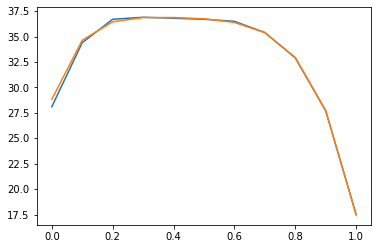

In [18]:
#Homework 03
#Problem 01 

import torch as t
from torch.autograd import Variable
import numpy as np
import math as m
from matplotlib import pyplot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

x_1=np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x_2=-x_1+1
Data_p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

water_Psat = 17.469999884208
dioxane_Psat = 28.824099527402

# Gradeint Descent 
x = Variable(t.tensor([0.6, 0.4]), requires_grad=True)
#step Size
a = 0.001 
for i in range(100):  
    for i in range(0,11):        
        loss = (((x_1[i]*t.exp(x[0]*((x[1]*x_2[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*water_Psat) + (x_2[i]*t.exp( x[1]*((x[0]*x_1[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*dioxane_Psat)) - Data_p[i])**2    
        loss.backward()
    x.grad.numpy()
    with t.no_grad():
       x -= a * x.grad       
       x.grad.zero_()       
print(x.data.numpy())
print(loss.data.numpy())
r = []
for i in range(0,11):
  P_optimized = ((x_1[i]*m.exp(x[0]*((x[1]*x_2[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*water_Psat) + (x_2[i]*m.exp( x[1]*((x[0]*x_1[i])/(x[0]*x_1[i]+x[1]*x_2[i]))**2)*dioxane_Psat))
  print("optimized_p =",P_optimized, "     measured_p =", Data_p[i])
  print("Error between optimuzed and measured P value =" , Data_p[i]-P_optimized)
  r.append(P_optimized)
plt.plot(x_1,Data_p)
plt.plot(x_1,r)